# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции
## Course 1 Week 3
### Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации 

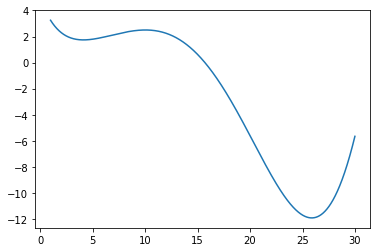

In [73]:
%matplotlib inline

import numpy as np
import scipy as sp
import math as math
import matplotlib.pyplot as plt

# Function definition
def func (x):
    """
    np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)
    """
    return math.sin(x/5.)*math.exp(x/10.) + 5.*math.exp(-x/2.)

# Draw function
def drawfunc(xmin, xmax, dx, func):

    # !!! Создадим список координат по оси X на отрезке [-xmin; xmax], включая концы
    xlist = np.arange (xmin, xmax, dx)
    #print xlist
    # Вычислим значение функции в заданных точках
    ylist = [func (x) for x in xlist]
    #print ylist
    # !!! Нарисуем одномерный график
    plt.plot (xlist, ylist)
    # !!! Покажем окно с нарисованным графиком
    plt.show()
    
drawfunc(1., 30, 0.01, func)    


5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [74]:
x0 = 12
sp.optimize.minimize(func, x0)

      fun: -11.898894665981146
 hess_inv: array([[1.6851537]])
      jac: array([-7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 12
   status: 0
  success: True
        x: array([25.88019227])

6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. 

*Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой*.

In [75]:
x0 = np.array([2.0])
Res1 = sp.optimize.minimize(func, x0, method='BFGS')
print Res1
# ! Значение функции
print (round(Res1.fun, 2))


      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])
1.75


7. Теперь измените начальное приближение на x=30. 

*Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.*

In [76]:
x0 = 30.0
Res2 = sp.optimize.minimize(func, x0, method='BFGS')
print Res2
print (round(Res2.fun, 2))

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])
-11.9


### Задача 2. Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

In [58]:
sp.optimize.differential_evolution(func, [(0,30)])

     fun: -11.898894665981281
     jac: array([-1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019266])

4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [77]:
Res3 = sp.optimize.differential_evolution(func, [(0,30)])
print (round(Res3.fun, 2))

-11.9


5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.


### Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

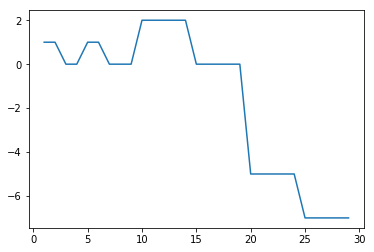

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
-5.0
     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 122
     nit: 7
 success: True
       x: array([24.03162822])
-11.0


In [87]:
def intFunc (x):
    """
    np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)
    """
    return int(math.sin(x/5)*math.exp(x/10) + 5*math.exp(-x/2))

drawfunc(1, 30, 1, intFunc)

# минимум функции h(x) с помощью BFGS
x0 = 30
Res4 = sp.optimize.minimize(intFunc, x0, method='BFGS')
print Res4
print (round(Res4.fun, 2))

# минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.
Res5 = sp.optimize.differential_evolution(intFunc, [(1,30)])
print Res5
print (round(Res5.fun, 2))